## Script desenvolvido por Lais Rodrigues - Linguagem Python
## Última atualização em setembro 2021

O objetivo do programa é analisar, numericamente, um problema comum em geofisica: fluxo de calor e temperatura da placa litosférica oceânica. Neste script, basta o usuário informar tamanho da placa (adimensional) e assim será possível visualizar as curvas de resfriamento e temperatura sob uma placa litosférica oceanica.

# A matemática descrita no algoritmo.

A criação da litosfera ocêanica ocorre na dorsal (ridge) e é destruída em margens convergentes. Durante o passar dos anos (muitos e muitos anos) essa litosfera se resfria. 

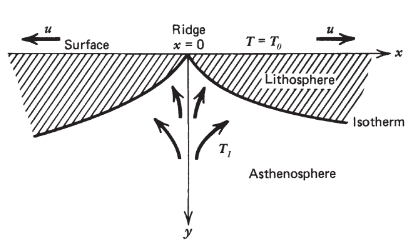
Figura 1 - Esquema de resfriamento da litosfera oceânica. u=velocidade de separação das placas; y=profundidade; x=representa a distância da dorsal centrada em x=0.

Como pode ser notado, a temperatura é máxima em x=0 (criação da placa) e diminui conforme se afasta da dorsal forçando a isoterma decrescer em profundidade. O que define a espessura da placa litosférica é a distância de y=0 até a linha isotérmica, ou seja, a placa litosfera oceânica não tem uma espessura fixa. 

Para entender como a temperatura e o fluxo de calor variam de acordo com a idade da placa (x>0) é necessário conhecer a equação de condução de calor:

            dT/dt = k*d²T/dy² (1)
            
            Onde:
            T = temperatura
            t = tempo
            k = difusividade térmica
            y = profundidade
            
A sua solução nos mostra como a temperatura varia de acordo com o tempo (idade) da placa e a profundidade.
Para resolver essa E.D.P, vamos assumir que inicialmente t=0 a placa tem temperatura T1 e ao passar os anos t>0, na superfície da placa y=0, a temperatura é mantida em T0 (ver figura 1). A base da placa y=yL0 (yL0 espessura da litosfera) é mantida com a temperatura T1, então vamos reescrever em conjunto de equações de condições iniciais e de contorno:

            T = T1 em t = 0, 0 ≤ y ≤ yL0
            T = T0 em y = 0, t > 0                      Conjunto de equações (2)
            T = T1 at y = yL0, t > 0

Ao resolver a E.D.P (1) utilizando as condições em (2) temos a solução de temperatura e fluxo de calor na placa no formato de série infinita. A solução para o modelo de placas pode ser facilmente implementada no código Python para ser analisada. Essa avaliação numérica pode ser facilitada se utilizarmos a temperatura e o fluxo de calor de maneira adimensional de acordo com:  

            theta (m,s) = m + 2/pi * SOMA(1/n * exp (-n²*pi²*s)*sen(n*pi*m)) (3)
            
            qzerobar (s) = 1 + 2 * SOMA(exp (-n²*pi²*s)) (4)
            
            Onde:
            
            Soma = somatório de n=1 a n=inf
            m = y/yL0
            s = kt / yL0²
            qzerobar = qzero * yL0 / (k*(T1-T0))
            
Dada as soluções (3) e (4) o usuário poderá alterar o tamanho da placa litosférica, espessura, espaçamento entre um ponto e outro na grade para o cálculo final. Para facilitar o entendimento das variáveis que estão dispostas no script (bloco de "Parâmetros de Modelo") veja a Figura 2 abaixo:            
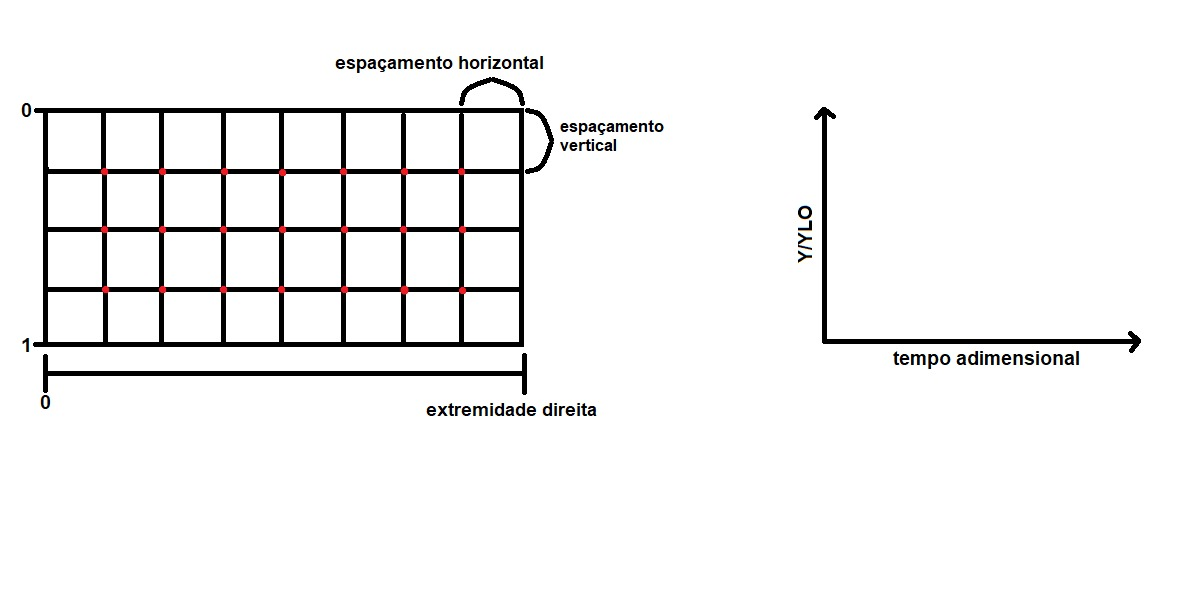
Figura 2 - A esquerda a ilustração de como é a grade de pontos no qual ocorre os cálculos para temperatura e fluxo de calor. Nos nós (pontos vermelhos) é calculado a temperatura e para cada coluna é calculado o fluxo de calor. O espaçamento vertical, horizontal e valor da extremidade da direita da placa podem ser alterados pelo usuário. Na direita temos um esboço de como estão dispostas as coordenadas vertical e horizontal.
            
É notável que o script trabalha com uma grade de dimensão (P,Q), onde P representa a quantidade de linhas na grade dentro de um intervalo de 0 a 1, onde 0 é o topo da placa e 1 é a base, e Q a quantidade de colunas que varia de zero até um valor dado pelo usuário que representa a extremidade direita da placa.          
Os cálculos ocorrem em variáveis adimensionais e isso pode dificultar um pouco o entendimento do modelo, por esse motivo são realizados 3 plotes ao executar o pograma: como o fluxo de calor varia com a idade da placa, como a temperatura varia de acordo com a idade da placa e como a temperatura varia de acordo com a espessura da placa. 

*Toda matemática foi retirada do livro: Geodynamics (2014), Turcotte D.L, Schubert G.

In [49]:
# MODULOS PYTHON

import numpy as np
import matplotlib.pyplot as plt

In [50]:
# FUNCAO

def plate_model (nimax,njmax,deltay,nf):
    "Essa funcao calcula a temperatura theta e o fluxo de calor qzerobar (adimensionais) para o modelo de placa do resfriamento da litosfera oceanica"
    
    #Criando os vetores theta e qzerobar com valores iniciais = 0
    theta=np.zeros((nimax,njmax))
    qzerobar=np.zeros(njmax)
    
    for nj in range (0,njmax,1):
        for ni in range (0,nimax,1):
            theta[ni][nj]=deltay*(ni-1) #Iniciando o valor de theta  (eta = y/yLo)

    for nj in range (0,njmax,1):
        for ni in range (0,nimax,1):
            qzerobar[nj]=1.0 #Iniciando o valor de fluxo de calor = 1
            
            #Looping para o calculo dos valores de theta e qzerobar
            for k in range (0,nf,1):
                theta[ni][nj]=theta[ni][nj]+(2.0/((k+1)*np.pi)*np.exp(-((k+1)*(k+1))*(np.pi**2)*(nj-1)*(1.0/(njmax-1)))*np.sin((k+1)*np.pi*(ni-1)*deltay))
                qzerobar[nj]=qzerobar[nj]+2.0*np.exp((-(k+1)*(k+1))*(np.pi**2)*(nj-1)*(1.0/(njmax-1)))
    
    
    #PLOTAGEM DOS RESULTADOS
    
    #Criando eixo_x que corresponde a coordenada horizontal (tempo adimensional)
    eixo_x=[]
    for x in range (0,njmax,1):
        eixo_x = np.append(eixo_x,x)
    
    #Plot do fluxo de calor (qzerobar)
    plt.plot(eixo_x, qzerobar, '-')
    plt.xlabel("nj-1")
    plt.ylabel("qzerobar")
    plt.xlim(0,njmax)
    plt.ylim((qzerobar[njmax-1],qzerobar[2]))
    plt.title("Fluxo de calor vs Tempo adimensional")
    plt.show()
    
    #Plot temperatura theta
    
    #Como a temperatura theta depende de dois parâmetros é necessário realizar os plots trabalhando em matriz.
    #Para o plot de temperatura vs tempo adimensional é fixada uma linha e plotado as colunas correspondentes ao
    #tempo adimensional. Para isso, neste script é fixada a linha que contêm os valores de theta no "centro" de nimax
    #para focar a visualização gráfica com maior detalhes (evitar de pegar as bordas da placa.)
    
    theta_horizontal = [] #Variavel correspondente a temperatura variando em função de tempo adimensional
    for c in range (0,njmax,1):
        theta_horizontal = np.append(theta_horizontal,theta[nimax/2][c])
    
    plt.plot(eixo_x,theta_horizontal,'r-')
    plt.xlabel("nj-1")
    plt.ylabel("Theta")
    plt.xlim(0,njmax)
    plt.ylim(theta_horizontal[njmax-1],theta_horizontal[2])
    plt.title("Temperatura Theta vs Tempo adimensional")
    plt.show()    
    
    #O plot de espessura da litosfera (adimensional) vs temperatura theta é feito da mesma maneira que o anterior.
    #Fixou a coluna e variou a linha. Para evitar de pegar as bordas da placa fixou a coluna njmax/2.
    
    #Criando eixo_y que corresponde ao eixo vertical adimensional.
    eixo_y=np.arange(0,1,(1.0/nimax)) #O topo da placa é 0 e a base da placa litosférica é 1
    
    #Variavel correspondente a temperatura variando em função de espessura litosferica
    theta_vertical = [] 
    for l in range (0,nimax,1):
        theta_vertical = np.append(theta_vertical,theta[l][njmax/2])
    
    plt.plot(theta_vertical,eixo_y,'k-')
    plt.xlabel("Theta")
    plt.ylabel("n = L/Lo")
    plt.xlim(theta_vertical[2],theta_vertical[-1])
    plt.ylim(1,0)
    plt.title("Espessura Litosfera vs Temperatura Theta")
    plt.show() 
   

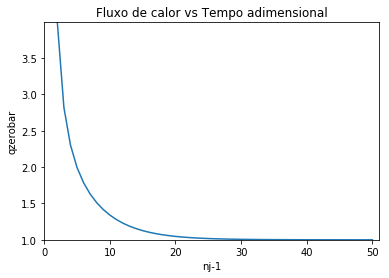

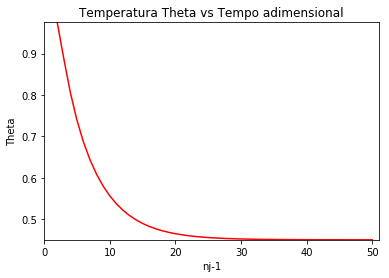

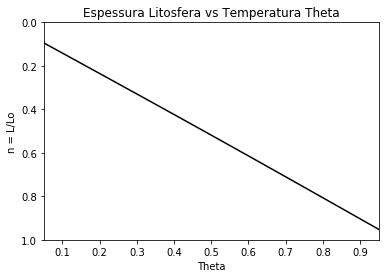

In [52]:
# PARÂMETROS DO MODELO

#Definições de valores para os parâmetros de entrada na função. Todos são adimensionais

#Valor da extremidade direita da placa.
ext_direita = 50 # 50 é o valor máximo para que a série não comece a divergir (ir para infinito)

#Definir espaçamento vertical na grade de pontos - Somente para theta que está em função da profundidade
esp_vertical = 0.05

#Definir o espaçamento horizontal entre a extremidade esquerda (em zero) e a extremidade direita (ext_direita)
esp_horizontal = 51 #O valor que entra no cálculo de theta e fluxo de calor é de 1/(esp_horizontal-1)

#Definir o passo para o cálculo de theta (em profundidade)
esp_theta = 21 #O valor que entra para o cálculo de theta é de 1/esp_theta 

plate_model(esp_theta,esp_horizontal,esp_vertical,ext_direita)